# Exploratory Data Analysis

This notebook explores published datasets, which use random image augmentation to supplement the original images. The purpose of this notebook is to improve developer understanding of the dataset, and to identify ways in which the dataset could be improved.

## Change working directory to project root

In [1]:
import os
ROOT_DIRECTORIES = {'imagegen', 'tests'}
if set(os.listdir('.')).intersection(ROOT_DIRECTORIES) != ROOT_DIRECTORIES:
    os.chdir('..')

## Imports and constants

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mlops.errors import PublicationPathAlreadyExistsError
from mlops.dataset.versioned_dataset import VersionedDataset
from imagegen.publish_dataset import publish_dataset, \
    DATASET_PUBLICATION_PATH_LOCAL, DATASET_VERSION
from imagegen.gan import GAN

## Publish versioned dataset

In [3]:
try:
    dataset_path = publish_dataset(DATASET_PUBLICATION_PATH_LOCAL)
except PublicationPathAlreadyExistsError:
    dataset_path = os.path.join(DATASET_PUBLICATION_PATH_LOCAL,
                                DATASET_VERSION)

## Retrieve versioned dataset

In [4]:
dataset = VersionedDataset(dataset_path)

## Explore versioned dataset

In [5]:
dataset.X_train.shape

(3893, 120, 120, 3)

In [16]:
num_image_rows = 4
num_image_cols = 4
num_images = num_image_rows * num_image_cols
start_idx = np.random.randint(0, len(dataset.X_train) - num_images)
image_grid = GAN.concatenate_images(
    dataset.X_train[start_idx:start_idx + num_images],
    num_image_rows,
    num_image_cols)

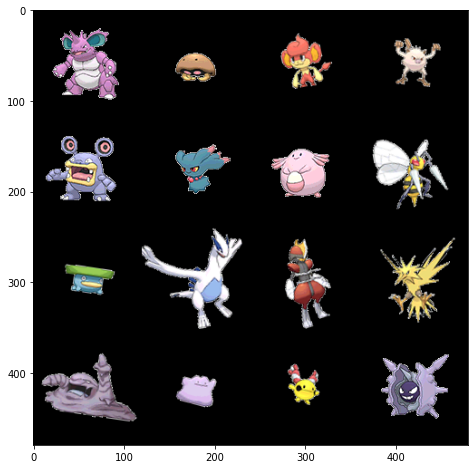

In [17]:
plt.figure(figsize=(8, 8))
plt.imshow(image_grid)
plt.show()